# <span style='color: green;'>The Amphibians Problem </span> 

#### We will follow the ML pipeline the building our model


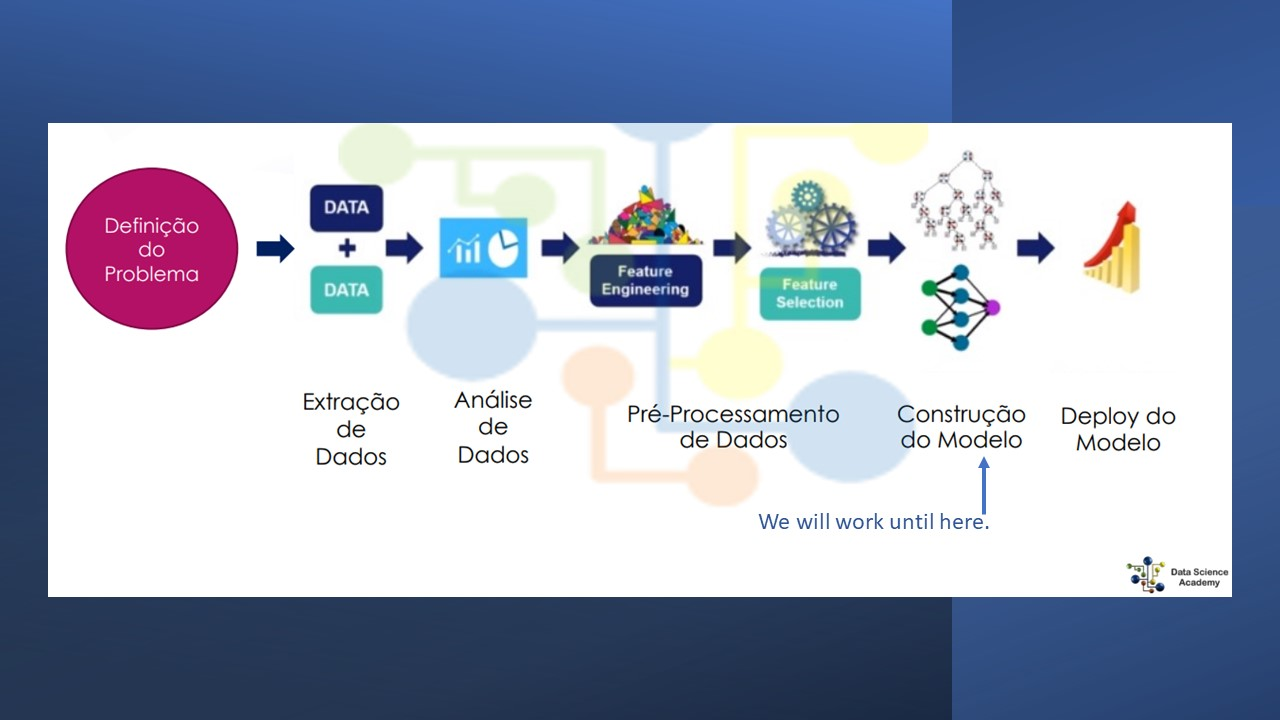

<img src="img/ml_pipeline.jpg" alt="PIPELINE" width="50"/>

# The Problem Definition

The dataset is a multilabel classification problem. The goal is to predict the presence of amphibians species near the water reservoirs based on features obtained from GIS systems and satellite images
font: https://archive.ics.uci.edu/dataset/528/amphibians

https://www.mdpi.com/2220-9964/8/3/123


outro artigo interessante https://www.mdpi.com/2220-9964/12/9/354


In [1]:
# importing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from skmultilearn.problem_transform import BinaryRelevance
import multiprocessing

### Importing and Exploring the data

In [2]:
# uploading data
path = "amphibians\dataset.csv"

In [3]:
df = pd.read_csv(path, sep=(";"))

In [4]:
df.head(7)

,Integer,Categorical,Numerical,Numerical.1,Categorical.1,Categorical.2,Categorical.3,Categorical.4,Categorical.5,Categorical.6,...,Ordinal.1,Categorical.8,Categorical.9,Label 1,Label 2,Label 3,Label 4,Label 5,Label 6,Label 7
0,ID,Motorway,SR,NR,TR,VR,SUR1,SUR2,SUR3,UR,...,BR,MR,CR,Green frogs,Brown frogs,Common toad,Fire-bellied toad,Tree frog,Common newt,Great crested newt
1,1,A1,600,1,1,4,6,2,10,0,...,0,0,1,0,0,0,0,0,0,0
2,2,A1,700,1,5,1,10,6,10,3,...,1,0,1,0,1,1,0,0,1,0
3,3,A1,200,1,5,1,10,6,10,3,...,1,0,1,0,1,1,0,0,1,0
4,4,A1,300,1,5,0,6,10,2,3,...,0,0,1,0,0,1,0,0,0,0
5,5,A1,600,2,1,4,10,2,6,0,...,5,0,1,0,1,1,1,0,1,1
6,6,A1,200,1,5,1,6,6,10,1,...,0,0,1,0,0,0,0,0,0,0


In [5]:
type_and_column = df.iloc[0:1].T
type_and_column

,0
Integer,ID
Categorical,Motorway
Numerical,SR
Numerical.1,NR
Categorical.1,TR
Categorical.2,VR
Categorical.3,SUR1
Categorical.4,SUR2
Categorical.5,SUR3
Categorical.6,UR


We can see details about the data in https://www.mdpi.com/2220-9964/8/3/123   
Each of feature has important information about the data, for exemple: The distant of buildings, trashs on the reservoirs, etc.  
The data used in the experiments was derived from GIS and satellite information, as well as from information gathered from the natural inventories that were prepared for the EIA reports for two planned road projects (Road A and Road B) in Poland [33,34,35,36,37].



<img src = "https://www.mdpi.com/ijgi/ijgi-08-00123/article_deploy/html/images/ijgi-08-00123-g002-550.jpg"  width="40%" height="5%">


### Transforming and exploring the data

We can see that the heads of the columns are the types of columns, let's fix that.

In [6]:
df_tranf_heads = pd.DataFrame(df.values[1:], columns=df.iloc[0])
df_tranf_heads

,ID,Motorway,SR,NR,TR,VR,SUR1,SUR2,SUR3,UR,...,BR,MR,CR,Green frogs,Brown frogs,Common toad,Fire-bellied toad,Tree frog,Common newt,Great crested newt
0,1,A1,600,1,1,4,6,2,10,0,...,0,0,1,0,0,0,0,0,0,0
1,2,A1,700,1,5,1,10,6,10,3,...,1,0,1,0,1,1,0,0,1,0
2,3,A1,200,1,5,1,10,6,10,3,...,1,0,1,0,1,1,0,0,1,0
3,4,A1,300,1,5,0,6,10,2,3,...,0,0,1,0,0,1,0,0,0,0
4,5,A1,600,2,1,4,10,2,6,0,...,5,0,1,0,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,185,S52,2300,1,12,3,2,2,1,0,...,1,0,1,0,1,0,0,0,0,0
185,186,S52,300,1,14,2,7,10,2,0,...,5,0,1,1,1,1,1,0,1,0
186,187,S52,500,1,1,4,1,10,2,0,...,5,0,1,1,1,1,1,0,1,0
187,188,S52,300,1,12,3,2,1,6,0,...,0,0,1,0,1,1,0,0,0,0


In [7]:
#checking the shape
df_tranf_heads.shape

(189, 23)

In [8]:
#Verifing the columns names
df_tranf_heads.columns

Index(['ID', 'Motorway', 'SR', 'NR', 'TR', 'VR', 'SUR1', 'SUR2', 'SUR3', 'UR',
       'FR', 'OR', 'RR', 'BR', 'MR', 'CR', 'Green frogs', 'Brown frogs',
       'Common toad', 'Fire-bellied toad', 'Tree frog', 'Common newt',
       'Great crested newt'],
      dtype='object', name=0)

In [9]:
#Checking the type of columns
df_tranf_heads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  189 non-null    object
 1   Motorway            189 non-null    object
 2   SR                  189 non-null    object
 3   NR                  189 non-null    object
 4   TR                  189 non-null    object
 5   VR                  189 non-null    object
 6   SUR1                189 non-null    object
 7   SUR2                189 non-null    object
 8   SUR3                189 non-null    object
 9   UR                  189 non-null    object
 10  FR                  189 non-null    object
 11  OR                  189 non-null    object
 12  RR                  189 non-null    object
 13  BR                  189 non-null    object
 14  MR                  189 non-null    object
 15  CR                  189 non-null    object
 16  Green frogs         189 no

In [10]:
#checking the memory usage
memory_usage1 = df_tranf_heads.memory_usage().sum()

In [11]:
#Verifing if there is NAN values
df_tranf_heads.isnull().any()

0
ID                    False
Motorway              False
SR                    False
NR                    False
TR                    False
VR                    False
SUR1                  False
SUR2                  False
SUR3                  False
UR                    False
FR                    False
OR                    False
RR                    False
BR                    False
MR                    False
CR                    False
Green frogs           False
Brown frogs           False
Common toad           False
Fire-bellied toad     False
Tree frog             False
Common newt           False
Great crested newt    False
dtype: bool

#### We can see that all the types of values are as object. What is not correct, we can see it in the data set documentation, and also in the original dataset heads.
#### Let's analyse and transforme it.

In [12]:
#TR is a categorical varible, unless we can see numbers, they represent categories.
df_tranf_heads.TR.unique()

array(['1', '5', '12', '14', '15', '11', '2', '7'], dtype=object)

In [13]:
#O artigo não menciona a presença de números fora do intervalo de 1 a 10 na variável TR. É possível que esses números sejam códigos internos usados pelos autores do artigo para representar os tipos de água1
df_tranf_heads.TR.value_counts()

1     116
12     23
15     19
5      12
14     10
11      4
2       4
7       1
Name: TR, dtype: int64

In [14]:
#Surface of the water reservoir [m2]
df_tranf_heads.SR

0       600
1       700
2       200
3       300
4       600
       ... 
184    2300
185     300
186     500
187     300
188     300
Name: SR, Length: 189, dtype: object

In [15]:
# The unique values
df_tranf_heads.SR.unique()

array(['600', '700', '200', '300', '500', '750', '7000', '1700', '8000',
       '30000', '1600', '3800', '2500', '800', '4500', '1000', '3300',
       '2100', '400', '1100', '100', '80000', '31000', '25000', '40000',
       '1900', '30', '4300', '4000', '1500', '28300', '50', '9000',
       '19300', '3500', '9100', '1300', '2000', '10050', '16000', '5000',
       '10000', '29000', '8250', '250', '500000', '50000', '450', '8300',
       '1800', '150', '900', '3000', '350', '6300', '3400', '2400',
       '115000', '360000', '4100', '2300', '15000', '2600', '26000',
       '1400', '22000'], dtype=object)

In [16]:
# Number of water reservoirs in habitat
df_tranf_heads.NR.unique()

array(['1', '2', '3', '6', '5', '7', '4', '9', '10', '12'], dtype=object)

In [17]:
#Percentage access from the edges of the reservoir to undeveloped areas (the proposed percentage ranges are a numerical reflection of the phrases: lack of access, low access, medium access, large access to free space):
#(a) 0–25%—lack of access or poor access
#(b) 25–50%—low access
#(c) 50–75%—medium access,
#(d) 75–100%—large access to terrestrial habitats of the shoreline is in contact with the terrestrial habitat of amphibians.
df_tranf_heads.OR.unique()

array(['50', '75', '25', '99', '100', '80'], dtype=object)

In [18]:
#Minimum distance from water reservoir to roads:
#1. <50 m
#2. 50–100 m
#3. 100–200 m
#4. 200–500 m
#5. 500–1000 m
#6. >1000 m

df_tranf_heads.RR.unique()

array(['0', '1', '2', '9', '5', '10'], dtype=object)

In [19]:
#Minimum distance to buildings:
#1.<50 m
#2.50–100 m
#3.100–200 m
#4.200–500 m
#5.500–1000 m
#6.>1000 m
df_tranf_heads.BR.unique()

array(['0', '1', '5', '2', '9', '10'], dtype=object)

### Transforme the datatype to numerical ones

#### With np.iinfo we can know what type of int we quem transforme the data.

In [20]:
np.iinfo("int16")

iinfo(min=-32768, max=32767, dtype=int16)

In [21]:
np.iinfo("int32")

iinfo(min=-2147483648, max=2147483647, dtype=int32)

In [22]:
np.iinfo("int8")

iinfo(min=-128, max=127, dtype=int8)

In [23]:

df_tranf_heads.SR = df_tranf_heads.SR.astype("int32")

In [24]:
# As we saw above, the NR feature goes until 12. Let's transforme it to int8
df_tranf_heads.NR = df_tranf_heads.NR.astype("int8")

In [25]:
# As we saw above, the OR feature goes until 100, and we a talking about percentege (We'll deal with it later). Let's transforme it to int8
df_tranf_heads.OR = df_tranf_heads.OR.astype("int8")

In [26]:
df_tranf_heads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  189 non-null    object
 1   Motorway            189 non-null    object
 2   SR                  189 non-null    int32 
 3   NR                  189 non-null    int8  
 4   TR                  189 non-null    object
 5   VR                  189 non-null    object
 6   SUR1                189 non-null    object
 7   SUR2                189 non-null    object
 8   SUR3                189 non-null    object
 9   UR                  189 non-null    object
 10  FR                  189 non-null    object
 11  OR                  189 non-null    int8  
 12  RR                  189 non-null    object
 13  BR                  189 non-null    object
 14  MR                  189 non-null    object
 15  CR                  189 non-null    object
 16  Green frogs         189 no

In [27]:
memory_usage2 = df_tranf_heads.memory_usage().sum()

### Analysing the Categoric types

#### Eventhough we can see numbers this columns have categorical information, and we have to transforme it in a numerical information, than we can work with Machine Learning.

In [28]:
#let's Analyse who are the Categorical types in this dataset.
categorical_col_types = type_and_column.T.filter(like="Categorical")
categorical_col_types

,Categorical,Categorical.1,Categorical.2,Categorical.3,Categorical.4,Categorical.5,Categorical.6,Categorical.7,Categorical.8,Categorical.9
0,Motorway,TR,VR,SUR1,SUR2,SUR3,UR,FR,MR,CR


In [29]:
#let's use one-hot-encoded to categorical ones
df_tranf_heads1= pd.get_dummies(df_tranf_heads, columns=categorical_col_types.iloc[0])

In [30]:
# We can say that RR and BR are also categorical because the numbers represents distances, but they are not efetively the distances 
ordinal_col_types = type_and_column.T.filter(like="Ordinal")
ordinal_col_types

,Ordinal,Ordinal.1
0,RR,BR


In [31]:
#let's use one-hot-encoded to ordinal ones
df_tranf_heads1= pd.get_dummies(df_tranf_heads1, columns=ordinal_col_types.iloc[0])

##### Our new dataset to work with Machine Learning

In [32]:

df_tranf_heads1

,ID,SR,NR,OR,Green frogs,Brown frogs,Common toad,Fire-bellied toad,Tree frog,Common newt,...,RR_10,RR_2,RR_5,RR_9,BR_0,BR_1,BR_10,BR_2,BR_5,BR_9
0,1,600,1,50,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,2,700,1,75,0,1,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,3,200,1,75,0,1,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,4,300,1,25,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,5,600,2,99,0,1,1,1,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,185,2300,1,75,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
185,186,300,1,100,1,1,1,1,0,1,...,0,0,1,0,0,0,0,0,1,0
186,187,500,1,100,1,1,1,1,0,1,...,0,0,1,0,0,0,0,0,1,0
187,188,300,1,100,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [33]:
#Let's that the information about the dataset after these transformations
df_tranf_heads1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 74 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  189 non-null    object
 1   SR                  189 non-null    int32 
 2   NR                  189 non-null    int8  
 3   OR                  189 non-null    int8  
 4   Green frogs         189 non-null    object
 5   Brown frogs         189 non-null    object
 6   Common toad         189 non-null    object
 7   Fire-bellied toad   189 non-null    object
 8   Tree frog           189 non-null    object
 9   Common newt         189 non-null    object
 10  Great crested newt  189 non-null    object
 11  Motorway_A1         189 non-null    uint8 
 12  Motorway_S52        189 non-null    uint8 
 13  TR_1                189 non-null    uint8 
 14  TR_11               189 non-null    uint8 
 15  TR_12               189 non-null    uint8 
 16  TR_14               189 no

In [34]:
memory_usage3 = df_tranf_heads1.memory_usage().sum()

#### We still having some object types. Let's see it.

In [35]:
# we still having same objects types
df_tranf_heads1.select_dtypes(include = "object")

,ID,Green frogs,Brown frogs,Common toad,Fire-bellied toad,Tree frog,Common newt,Great crested newt
0,1,0,0,0,0,0,0,0
1,2,0,1,1,0,0,1,0
2,3,0,1,1,0,0,1,0
3,4,0,0,1,0,0,0,0
4,5,0,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...
184,185,0,1,0,0,0,0,0
185,186,1,1,1,1,0,1,0
186,187,1,1,1,1,0,1,0
187,188,0,1,1,0,0,0,0


In [36]:
#OK much of then are our target label, let's identify then.
classification_target = type_and_column.T.filter(like="Label")
classification_target

,Label 1,Label 2,Label 3,Label 4,Label 5,Label 6,Label 7
0,Green frogs,Brown frogs,Common toad,Fire-bellied toad,Tree frog,Common newt,Great crested newt


In [37]:
classification_target_list = classification_target.iloc[0].to_list()
classification_target_list

['Green frogs',
 'Brown frogs',
 'Common toad',
 'Fire-bellied toad',
 'Tree frog',
 'Common newt',
 'Great crested newt']

In [38]:
#At these columns we just have 0 and 1s. Let's transforme to another data type.
df_tranf_heads1[classification_target_list]=df_tranf_heads1[classification_target_list].astype("int8")

In [39]:
df_tranf_heads1.shape


(189, 74)

In [40]:
df_tranf_heads1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 74 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  189 non-null    object
 1   SR                  189 non-null    int32 
 2   NR                  189 non-null    int8  
 3   OR                  189 non-null    int8  
 4   Green frogs         189 non-null    int8  
 5   Brown frogs         189 non-null    int8  
 6   Common toad         189 non-null    int8  
 7   Fire-bellied toad   189 non-null    int8  
 8   Tree frog           189 non-null    int8  
 9   Common newt         189 non-null    int8  
 10  Great crested newt  189 non-null    int8  
 11  Motorway_A1         189 non-null    uint8 
 12  Motorway_S52        189 non-null    uint8 
 13  TR_1                189 non-null    uint8 
 14  TR_11               189 non-null    uint8 
 15  TR_12               189 non-null    uint8 
 16  TR_14               189 no

#### Checking the memory usage

In [41]:

memory_usage4 = df_tranf_heads1.memory_usage().sum()

In [42]:
#Here we can see how was the improvement in memory usage
print(f'The df without before first processing: {memory_usage1}')
print(f'The df without after first processing: {memory_usage2}')
print(f'The df without after second processing: {memory_usage3}')
print(f'The df without after third processing: {memory_usage4}')
improment = round(float(int(memory_usage4)/int(memory_usage1)*100),2)
print(f'Total of the improvement in memory usage {improment}%')

The df without before first processing: 34904
The df without after first processing: 31502
The df without after second processing: 25265
The df without after third processing: 16004
Total of the improvement in memory usage 45.85%


In [43]:
#Here we can see the labels we'll work in our Multilabel classification problema, and how much the are"
amphibians_chart = df_tranf_heads1[classification_target_list].sum().to_frame().reset_index()
amphibians_chart=amphibians_chart.rename(columns={"index":"amphibian class", 0 : "Total"})
amphibians_chart

,amphibian class,Total
0,Green frogs,108
1,Brown frogs,148
2,Common toad,124
3,Fire-bellied toad,58
4,Tree frog,71
5,Common newt,58
6,Great crested newt,21


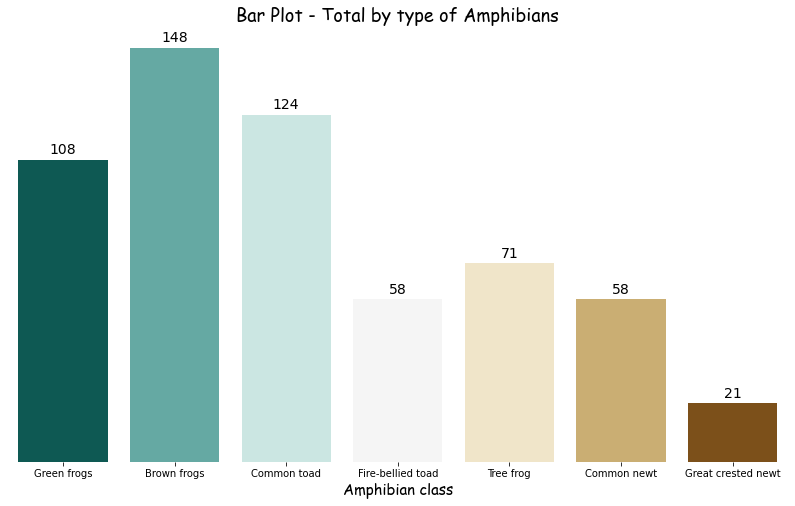

In [44]:
#Let's building a chart

plt.figure(figsize=(14,8))
ax = sns.barplot(data=amphibians_chart,x = "amphibian class", y = "Total", palette = ["#01665e","#5ab4ac","#c7eae5","#f5f5f5","#f6e8c3","#d8b365","#8c510a"])
csfont = {'fontname':'Comic Sans MS'}
ax.set_title("Bar Plot - Total by type of Amphibians", fontdict = {'fontsize':18}, **csfont)
ax.set_xlabel("Amphibian class",fontdict = {'fontsize':15}, **csfont)
ax.set_ylabel("Total", fontdict={'fontsize' : 15})
ax.yaxis.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)


#Annotate the bars with value
for p, v in zip(ax.patches, amphibians_chart['Total']): 
 height = p.get_height() 
 ax.text(p.get_x() + p.get_width() / 2, height + 1, v, 
 ha='center', va='bottom', fontdict = {'fontsize':14}) 
plt.savefig("charts/Bar Plot by type of Amphibians.png",transparent = False,facecolor ="w",bbox_inches ="tight",pad_inches = 1,edgecolor ='w',orientation ='landscape')
plt.show()




In [45]:
stacking_df_tranf_heads1 = (
        df_tranf_heads1[['SR','NR','Brown frogs', 'Common newt', 'Common toad', 'Fire-bellied toad',
       'Great crested newt', 'Green frogs', 'Tree frog']]
        .set_index(['SR','NR'])
        .replace(0,np.nan) # replacing yhe no presence of amphibians type with nan value
        .stack() #stacking the labels of amphibians classes
        .reset_index(name='The Presence') #renaming the new column
        .rename(columns={'level_2':'Amphibians Type','SR':'Surface of the water reservoir [m2]','NR':'Number of water reservoirs in habita'}) #renaming the columns of amphibians
        
    
    )
stacking_df_tranf_heads1   

,Surface of the water reservoir [m2],Number of water reservoirs in habita,Amphibians Type,The Presence
0,700,1,Brown frogs,1.0
1,700,1,Common newt,1.0
2,700,1,Common toad,1.0
3,200,1,Brown frogs,1.0
4,200,1,Common newt,1.0
...,...,...,...,...
583,500,1,Green frogs,1.0
584,300,1,Brown frogs,1.0
585,300,1,Common toad,1.0
586,300,1,Brown frogs,1.0


In [46]:
stacking_df_tranf_heads1.shape

(588, 4)

C:\Users\recal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 1080x576 with 0 Axes>

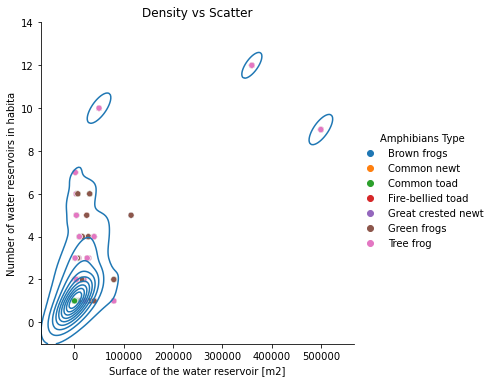

In [47]:
# plot
plt.figure(figsize=(15,8))
sns.relplot(x='Surface of the water reservoir [m2]',y = 'Number of water reservoirs in habita', hue="Amphibians Type", data=stacking_df_tranf_heads1[['Surface of the water reservoir [m2]','Number of water reservoirs in habita',"Amphibians Type"]])
sns.kdeplot(stacking_df_tranf_heads1['Surface of the water reservoir [m2]'], stacking_df_tranf_heads1['Number of water reservoirs in habita'])
plt.title('Density vs Scatter');
plt.savefig("charts/Density vs Scatter.png",transparent = False,facecolor ="w",bbox_inches ="tight",pad_inches = 1,edgecolor ='w',orientation ='landscape')
plt.show()


<Figure size 1080x576 with 0 Axes>

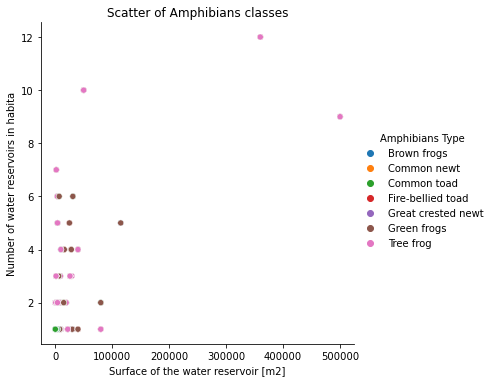

In [48]:
plt.figure(figsize=(15,8))

sns.relplot(x='Surface of the water reservoir [m2]',y = 'Number of water reservoirs in habita', hue="Amphibians Type", data=stacking_df_tranf_heads1[['Surface of the water reservoir [m2]','Number of water reservoirs in habita',"Amphibians Type"]])
plt.title('Scatter of Amphibians classes');
plt.savefig("charts/Scatter.png",transparent = False,facecolor ="w",bbox_inches ="tight",pad_inches = 1,edgecolor ='w',orientation ='landscape')
plt.show()


In [49]:
criteria_fire_belied_toad = stacking_df_tranf_heads1["Amphibians Type"]=="Fire-bellied toad"
criteria_common_newt =stacking_df_tranf_heads1["Amphibians Type"]=="Common newt"
criteria_great_crested_newt =stacking_df_tranf_heads1["Amphibians Type"]=="Great crested newt"
criteria_total = criteria_fire_belied_toad|criteria_common_newt|criteria_great_crested_newt
least_representative_classes =stacking_df_tranf_heads1.drop(columns="The Presence")
least_representative_classes =least_representative_classes[criteria_total]

In [50]:
least_representative_classes

,Surface of the water reservoir [m2],Number of water reservoirs in habita,Amphibians Type
1,700,1,Common newt
4,200,1,Common newt
8,600,2,Common newt
10,600,2,Fire-bellied toad
11,600,2,Great crested newt
...,...,...,...
563,4000,2,Great crested newt
575,300,1,Common newt
577,300,1,Fire-bellied toad
580,500,1,Common newt


<Figure size 1080x576 with 0 Axes>

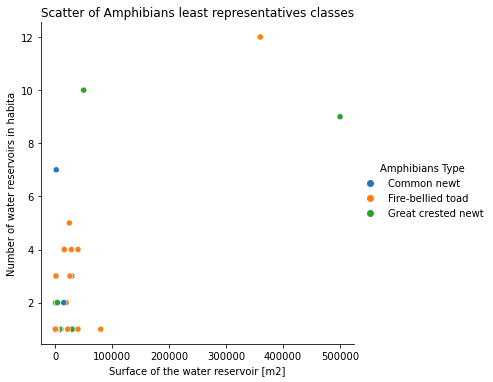

In [51]:
#I cannot see the classes with small figures. I'll plot those.

plt.figure(figsize=(15,8))

sns.relplot(x='Surface of the water reservoir [m2]',y = 'Number of water reservoirs in habita', hue="Amphibians Type", data=least_representative_classes[['Surface of the water reservoir [m2]','Number of water reservoirs in habita',"Amphibians Type"]])
plt.title('Scatter of Amphibians least representatives classes');
plt.savefig("charts/Scatter Least Represenative Classes.png",transparent = False,facecolor ="w",bbox_inches ="tight",pad_inches = 1,edgecolor ='w',orientation ='landscape')
plt.show()

C:\Users\recal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 1080x576 with 0 Axes>

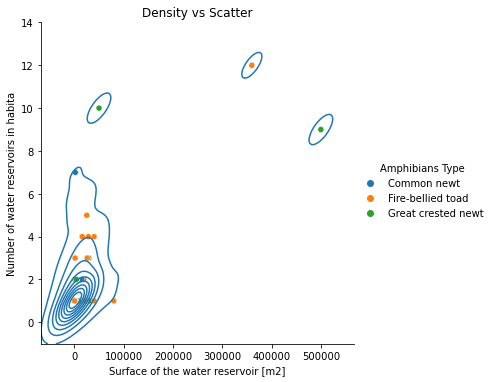

In [52]:
# plot
plt.figure(figsize=(15,8))
sns.relplot(x='Surface of the water reservoir [m2]',y = 'Number of water reservoirs in habita', hue="Amphibians Type", data=least_representative_classes[['Surface of the water reservoir [m2]','Number of water reservoirs in habita',"Amphibians Type"]])
sns.kdeplot(stacking_df_tranf_heads1['Surface of the water reservoir [m2]'], stacking_df_tranf_heads1['Number of water reservoirs in habita'])
plt.title('Density vs Scatter');
plt.savefig("charts/Density vs Scatter.png",transparent = False,facecolor ="w",bbox_inches ="tight",pad_inches = 1,edgecolor ='w',orientation ='landscape')
plt.show()


The original heads Label 1 to Label 7 are the target we are looking for

## Building the Model


In [53]:
#Here we will drop the column that is not important to our mochine learning training e model.
df_tranf_heads1 = df_tranf_heads1.drop(columns = "ID")

In [54]:
classification_target_list

['Green frogs',
 'Brown frogs',
 'Common toad',
 'Fire-bellied toad',
 'Tree frog',
 'Common newt',
 'Great crested newt']

In [55]:
#Now we will identify the variables we will work in our ML problem.
feature = []
for col in df_tranf_heads1.columns:
    if col not in classification_target_list:
        feature.append(col)


In [56]:
feature

['SR',
 'NR',
 'OR',
 'Motorway_A1',
 'Motorway_S52',
 'TR_1',
 'TR_11',
 'TR_12',
 'TR_14',
 'TR_15',
 'TR_2',
 'TR_5',
 'TR_7',
 'VR_0',
 'VR_1',
 'VR_2',
 'VR_3',
 'VR_4',
 'SUR1_1',
 'SUR1_10',
 'SUR1_14',
 'SUR1_2',
 'SUR1_4',
 'SUR1_6',
 'SUR1_7',
 'SUR1_9',
 'SUR2_1',
 'SUR2_10',
 'SUR2_11',
 'SUR2_2',
 'SUR2_6',
 'SUR2_7',
 'SUR2_9',
 'SUR3_1',
 'SUR3_10',
 'SUR3_11',
 'SUR3_2',
 'SUR3_5',
 'SUR3_6',
 'SUR3_7',
 'SUR3_9',
 'UR_0',
 'UR_1',
 'UR_3',
 'FR_0',
 'FR_1',
 'FR_2',
 'FR_3',
 'FR_4',
 'MR_0',
 'MR_1',
 'MR_2',
 'CR_1',
 'CR_2',
 'RR_0',
 'RR_1',
 'RR_10',
 'RR_2',
 'RR_5',
 'RR_9',
 'BR_0',
 'BR_1',
 'BR_10',
 'BR_2',
 'BR_5',
 'BR_9']

In [57]:
len(feature)

66

In [58]:
# Let's split the dataset into feature and Target then we can use it.
df_x = df_tranf_heads1[feature]
df_y = df_tranf_heads1[classification_target_list]


In [59]:
#Let's create an instance of MultiLabelBinarizer class
mlb = MultiLabelBinarizer()
mlb.fit([classification_target_list])

MultiLabelBinarizer()

In [60]:
# To work with Binary Relevance we need to convert (zeros)0 and 1(ones) into an array. Let's use the numpy for that.
enconded_mlb = df_y.to_numpy()
enconded_mlb

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 1, 0],
       [0, 1, 1, ..., 0, 1, 0],
       ...,
       [1, 1, 1, ..., 0, 1, 0],
       [0, 1, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0]], dtype=int8)

In [61]:
#Let's use Fit to storage the labels in the classes_ of the binarizer.
mlb.fit([classification_target_list])
mlb.classes_

array(['Brown frogs', 'Common newt', 'Common toad', 'Fire-bellied toad',
       'Great crested newt', 'Green frogs', 'Tree frog'], dtype=object)

In [62]:
#Dividing the df into training and test
train_x, test_x, train_y, test_y = train_test_split(df_x, enconded_mlb)

In [63]:
test_x.columns

Index(['SR', 'NR', 'OR', 'Motorway_A1', 'Motorway_S52', 'TR_1', 'TR_11',
       'TR_12', 'TR_14', 'TR_15', 'TR_2', 'TR_5', 'TR_7', 'VR_0', 'VR_1',
       'VR_2', 'VR_3', 'VR_4', 'SUR1_1', 'SUR1_10', 'SUR1_14', 'SUR1_2',
       'SUR1_4', 'SUR1_6', 'SUR1_7', 'SUR1_9', 'SUR2_1', 'SUR2_10', 'SUR2_11',
       'SUR2_2', 'SUR2_6', 'SUR2_7', 'SUR2_9', 'SUR3_1', 'SUR3_10', 'SUR3_11',
       'SUR3_2', 'SUR3_5', 'SUR3_6', 'SUR3_7', 'SUR3_9', 'UR_0', 'UR_1',
       'UR_3', 'FR_0', 'FR_1', 'FR_2', 'FR_3', 'FR_4', 'MR_0', 'MR_1', 'MR_2',
       'CR_1', 'CR_2', 'RR_0', 'RR_1', 'RR_10', 'RR_2', 'RR_5', 'RR_9', 'BR_0',
       'BR_1', 'BR_10', 'BR_2', 'BR_5', 'BR_9'],
      dtype='object')

In [64]:
len(test_x.columns)

66

## Random Forest Classifier

In [65]:
#We will use the Random Forest Classifier
multi_label_model = BinaryRelevance(RandomForestClassifier())

In [66]:
#Training
multi_label_model.fit(train_x, train_y)

BinaryRelevance(classifier=RandomForestClassifier(), require_dense=[True, True])

In [67]:
#Checking the metrics 
from sklearn.metrics import f1_score, hamming_loss

predictions_test_y = multi_label_model.predict(test_x)
total_hamming_loss = hamming_loss(y_true = test_y, y_pred=predictions_test_y)
f1_score = f1_score(y_true = test_y, y_pred=predictions_test_y, average = "micro")
print("Total Hamming Loss of Model :", total_hamming_loss )
print("F1 Score :", f1_score)

Total Hamming Loss of Model : 0.2857142857142857
F1 Score : 0.6842105263157895


In [68]:
classes = ['Brown frogs', 'Common newt', 'Common toad', 'Fire-bellied toad',
       'Great crested newt', 'Green frogs', 'Tree frog']
for _class in classes:
    class_index = np.where(mlb.classes_ == _class)[0][0]
    print(class_index)
    multi_label_model.classifiers_[class_index].predict_proba(df_x)[:,1]
    print( multi_label_model.classifiers_[class_index].predict_proba(df_x)[:,1])

0
[0.1  0.13 0.1  0.2  0.07 0.11 0.15 0.69 0.2  0.09 0.8  0.35 0.95 0.8
 0.15 0.89 0.38 0.22 0.78 0.94 0.85 0.48 0.21 0.14 0.54 0.92 0.12 0.3
 0.5  0.14 0.2  0.2  0.38 0.1  0.14 0.26 0.3  0.12 0.13 0.31 0.79 0.14
 0.18 0.36 0.92 0.69 0.95 0.92 0.75 0.15 0.83 0.7  0.14 0.38 0.35 0.29
 0.9  0.17 0.97 0.81 0.74 0.78 0.93 0.73 0.74 0.63 0.43 0.12 0.01 0.92
 0.86 0.9  0.15 0.91 0.87 0.39 0.26 0.31 0.4  0.61 0.64 0.25 0.32 0.15
 0.95 0.87 0.27 0.2  0.93 0.67 0.96 0.78 0.76 0.68 0.92 0.94 0.28 0.94
 0.89 0.74 0.92 0.14 0.95 0.93 0.95 0.82 0.13 0.42 0.86 0.99 0.79 0.87
 0.87 0.86 0.02 0.02 0.1  0.85 0.8  0.8  0.47 0.62 0.1  0.13 0.12 0.06
 0.58 0.93 0.22 0.23 0.21 0.41 0.93 0.63 0.94 0.98 0.88 0.87 0.92 0.93
 0.9  0.98 0.77 0.96 0.91 0.98 0.76 0.83 0.84 0.59 0.96 0.49 0.67 0.96
 0.93 0.53 0.95 0.05 0.76 0.09 0.83 0.87 0.28 0.95 0.88 0.13 0.44 0.86
 0.06 0.17 0.82 0.03 0.12 0.25 0.14 0.93 0.14 0.5  0.23 0.63 0.94 0.12
 0.88 0.17 0.17 0.45 0.52 0.08 0.13]
1
[0.24 0.96 0.9  0.19 0.91 0.09 0.04 0.

In [69]:
print(class_index)


6


In [70]:
# Now we'll write a function to do ROC curve plotting for individual binary classifiers.
from sklearn.metrics import roc_curve, auc
import numpy as np

def plot_roc_curve (X=None, y=None, classes=[], title = None):
    lw=2
    plt.figure(figsize=(12,6))
    for _class in classes:
        class_index = np.where(mlb.classes_ == _class)[0][0]
        #print(class_index)
        probs = multi_label_model.classifiers_[class_index].predict_proba(X)[:,1]
        #print(probs)
        model_fpr, model_tpr, _ = roc_curve(y[:,class_index], probs)
        roc_auc = auc(model_fpr, model_tpr)
        plt.plot(model_fpr, model_tpr, lw=lw, label='ROC curve -' + _class + '-(area =%0.2f)' % roc_auc)
        
    plt.plot([0,1],[0,1], color = "navy", lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.savefig(f"charts/{title}.png",transparent = False,facecolor ="w",bbox_inches ="tight",pad_inches = 1,edgecolor ='w',orientation ='landscape')
    plt.show()
    

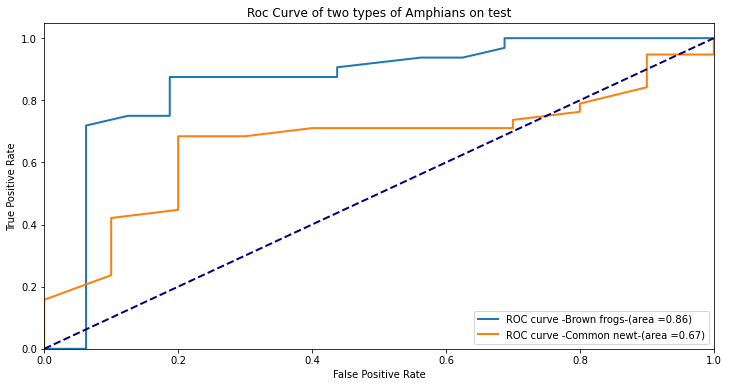

In [71]:
plot_roc_curve(X = test_x, y=test_y, classes = ['Brown frogs', 'Common newt'], title = 'Roc Curve of two types of Amphians on test')

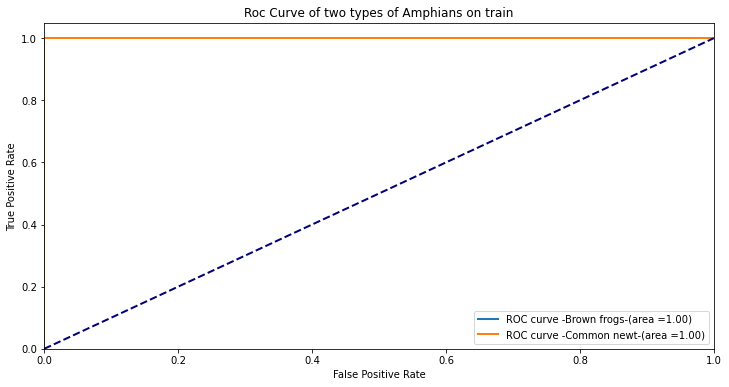

In [72]:
plot_roc_curve(X = train_x, y=train_y, classes = ['Brown frogs', 'Common newt'], title = 'Roc Curve of two types of Amphians on train')

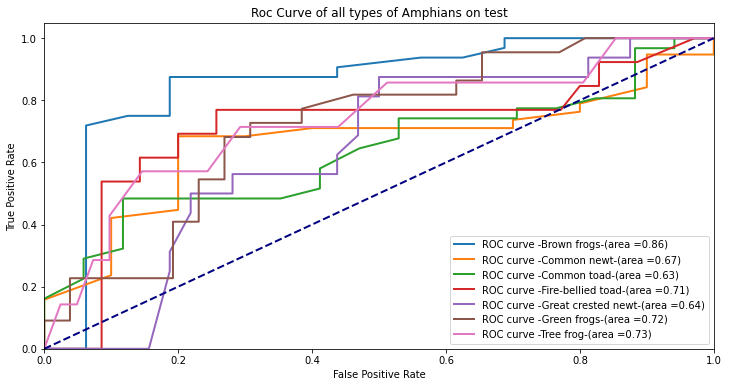

In [73]:
plot_roc_curve(X = test_x, y=test_y, classes = ['Brown frogs', 'Common newt', 'Common toad', 'Fire-bellied toad',
       'Great crested newt', 'Green frogs', 'Tree frog'], title = 'Roc Curve of all types of Amphians on test')

### We can see that this is a good classifier because the coverange of area is close to 1 when aplayed to train data.

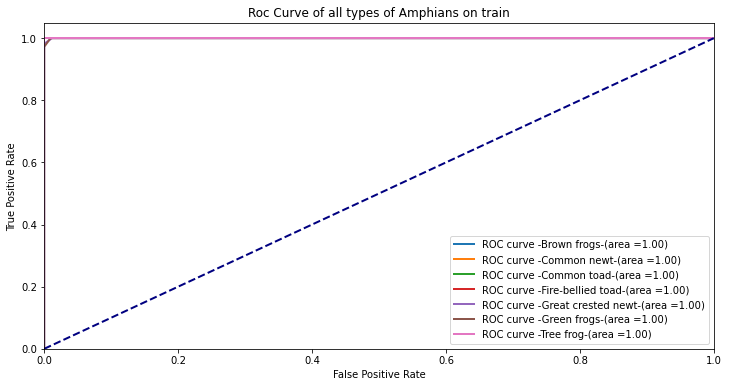

In [74]:
plot_roc_curve(X = train_x, y=train_y, classes = ['Brown frogs', 'Common newt', 'Common toad', 'Fire-bellied toad',
       'Great crested newt', 'Green frogs', 'Tree frog'], title = 'Roc Curve of all types of Amphians on train')


The Hamming loss is OK and the F1 score is acetable to this execise. 

Blachnik, M., Sołtysiak, M., & Dąbrowska, D. (2019). Predicting Presence of Amphibian Species Using Features Obtained from GIS and Satellite Images. ISPRS International Journal of Geo-Information, 8(3), 123. https://doi.org/10.3390/ijgi8030123